<a href="https://colab.research.google.com/github/crissyro/kaggle_projects/blob/main/notebooks/math_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#!/bin/bash
! kaggle datasets download noeyislearning/mathe-mathematics-learning-and-assessment

Dataset URL: https://www.kaggle.com/datasets/noeyislearning/mathe-mathematics-learning-and-assessment
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/45.8k [00:00<?, ?B/s]
100% 45.8k/45.8k [00:00<00:00, 55.9MB/s]


In [15]:
! apt install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [17]:
!unzip mathe-mathematics-learning-and-assessment.zip

Archive:  mathe-mathematics-learning-and-assessment.zip
  inflating: math_e.csv              


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [61]:
df = pd.read_csv('math_e.csv', sep=';', encoding='iso-8859-1', on_bad_lines='skip')
df.head()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


In [62]:
df['Question Level'].value_counts()

,count
Question Level,
Basic,7844
Advanced,1702


In [63]:
df['Question Level'] = df['Question Level'].map({'Basic': 0, 'Advanced': 1})
df

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,0,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,0,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,0,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,0,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,0,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
...,...,...,...,...,...,...,...,...
9541,175,Italy,1497,1,0,Complex Numbers,Complex Numbers,"Imaginary part,Conjugate number,Modulus of a c..."
9542,175,Italy,1514,0,0,Complex Numbers,Complex Numbers,Operations with complex numbers
9543,175,Italy,1521,0,0,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...","Quadratic equations,Simplify expressions,Linea..."
9544,175,Italy,1526,1,0,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...","Linear equations,Quadratic equations,Simplify ..."


In [70]:
df['Subtopic'].value_counts()

,count
Subtopic,
Vector Spaces,2749
Linear Transformations,2127
Complex Numbers,592
"Algebraic expressions, Equations, and Inequalities",496
Linear Systems,420
Analytic Geometry,358
Statistics,340
Elementary Geometry,322
Derivatives,317


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   int64 
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(4), object(4)
memory usage: 596.8+ KB


In [55]:
df.describe()

,Student ID,Question ID,Type of Answer
count,9546.000000,0.0,9546.000000
mean,775.402263,NaN,0.468259
std,460.590559,NaN,0.499018
min,26.000000,NaN,0.000000
25%,380.000000,NaN,0.000000
50%,885.000000,NaN,0.000000
75%,1219.000000,NaN,1.000000
max,1565.000000,NaN,1.000000


In [65]:
df.isnull().sum()

,0
Student ID,0
Student Country,0
Question ID,0
Type of Answer,0
Question Level,0
Topic,0
Subtopic,0
Keywords,0


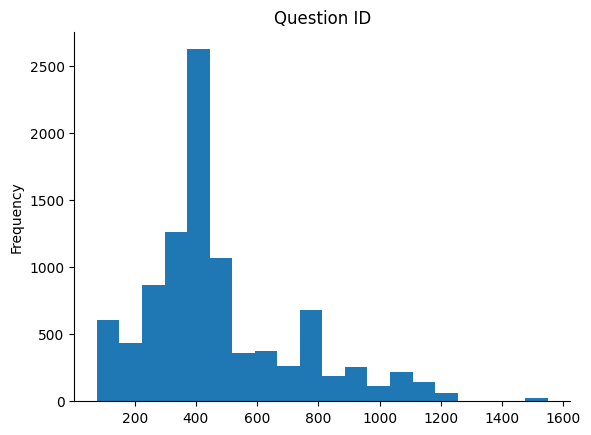

In [66]:
# @title Question ID

df['Question ID'].plot(kind='hist', bins=20, title='Question ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

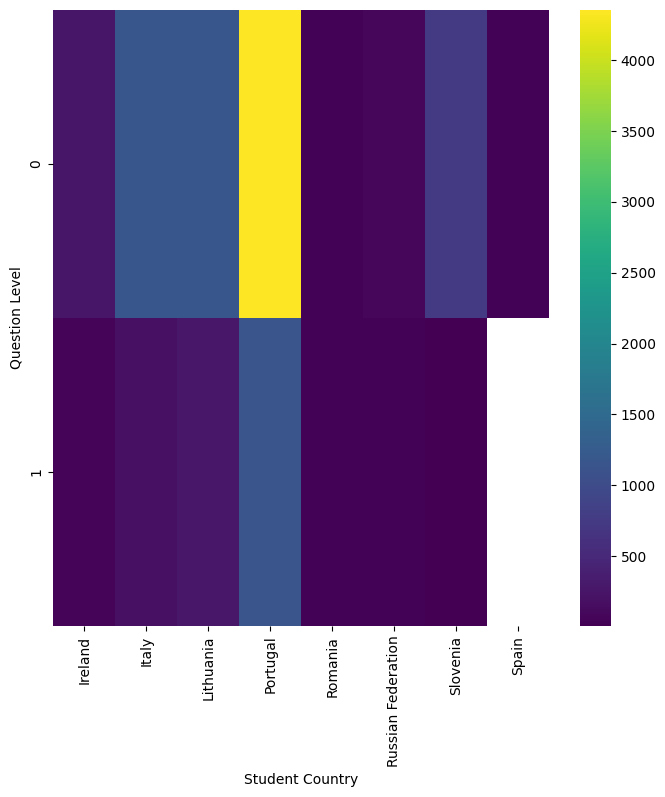

In [67]:
# @title Student Country vs Question Level

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Question Level'].value_counts()
    for x_label, grp in df.groupby('Student Country')
})

sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Student Country')
plt.ylabel('Question Level');

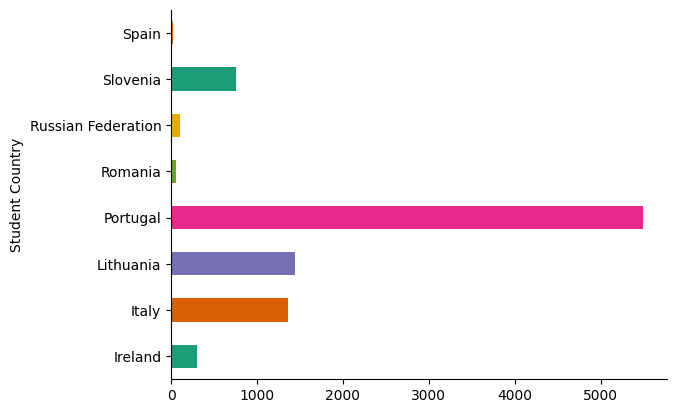

In [68]:
# @title Student Country

df.groupby('Student Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

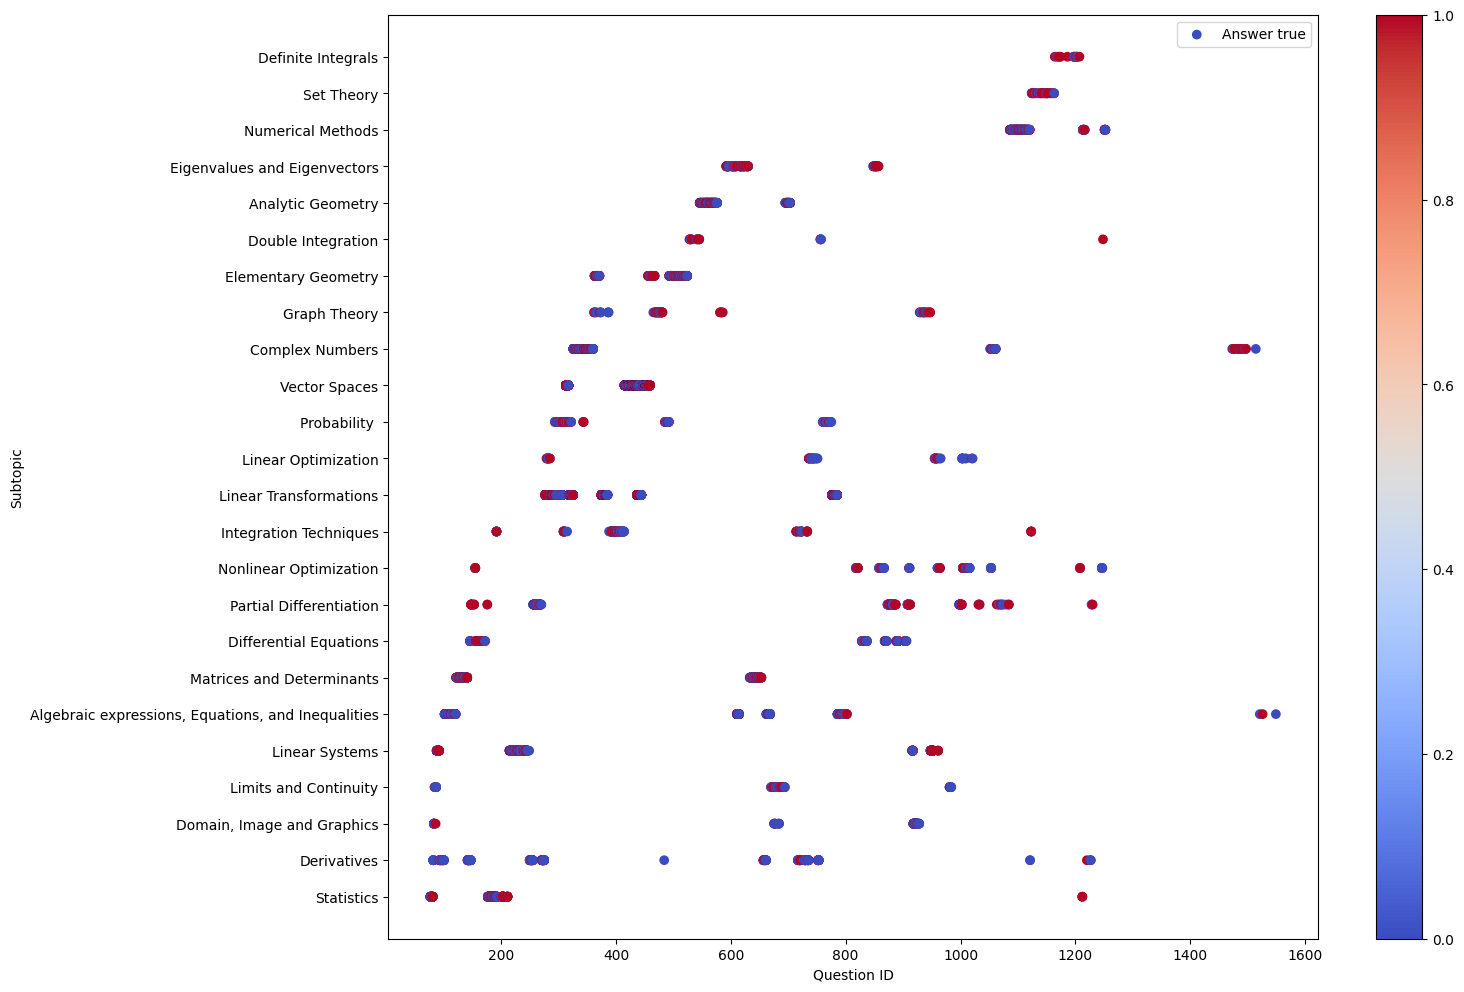

In [74]:
plt.figure(figsize=(15,12))
plt.scatter(df['Question ID'], df['Subtopic'], c=df['Type of Answer'], cmap='coolwarm')
plt.legend(['Answer true', 'Answer false'])
plt.colorbar()
plt.xlabel('Question ID')
plt.ylabel('Subtopic');

In [82]:
df.groupby(['Subtopic', 'Type of Answer'])['Type of Answer'].count()

Subtopic                                            Type of Answer
Algebraic expressions, Equations, and Inequalities  0                  304
                                                    1                  192
Analytic Geometry                                   0                  183
                                                    1                  175
Complex Numbers                                     0                  323
                                                    1                  269
Definite Integrals                                  0                    4
                                                    1                   11
Derivatives                                         0                  204
                                                    1                  113
Differential Equations                              0                   50
                                                    1                   58
Domain, Image and Graphics                          0                   70
                                                    1                   37
Double Integration                                  0                    8
                                                    1                   10
Eigenvalues and Eigenvectors                        0                   56
                                                    1                   74
Elementary Geometry                                 0                  133
                                                    1                  189
Graph Theory                                        0                   23
                                                    1                   32
Integration Techniques                              0                   68
                                                    1                   43
Limits and Continuity                               0                   36
                                                    1                   21
Linear Optimization                                 0                   41
                                                    1                   15
Linear Systems                                      0                  184
                                                    1                  236
Linear Transformations                              0                 1056
                                                    1                 1071
Matrices and Determinants                           0                  149
                                                    1                  151
Nonlinear Optimization                              0                   71
                                                    1                   55
Numerical Methods                                   0                  190
                                                    1                  120
Partial Differentiation                             0                  177
                                                    1                   85
Probability                                         0                   80
                                                    1                   48
Set Theory                                          0                   15
                                                    1                   27
Statistics                                          0                  177
                                                    1                  163
Vector Spaces                                       0                 1474
                                                    1                 1275
Name: Type of Answer, dtype: int64

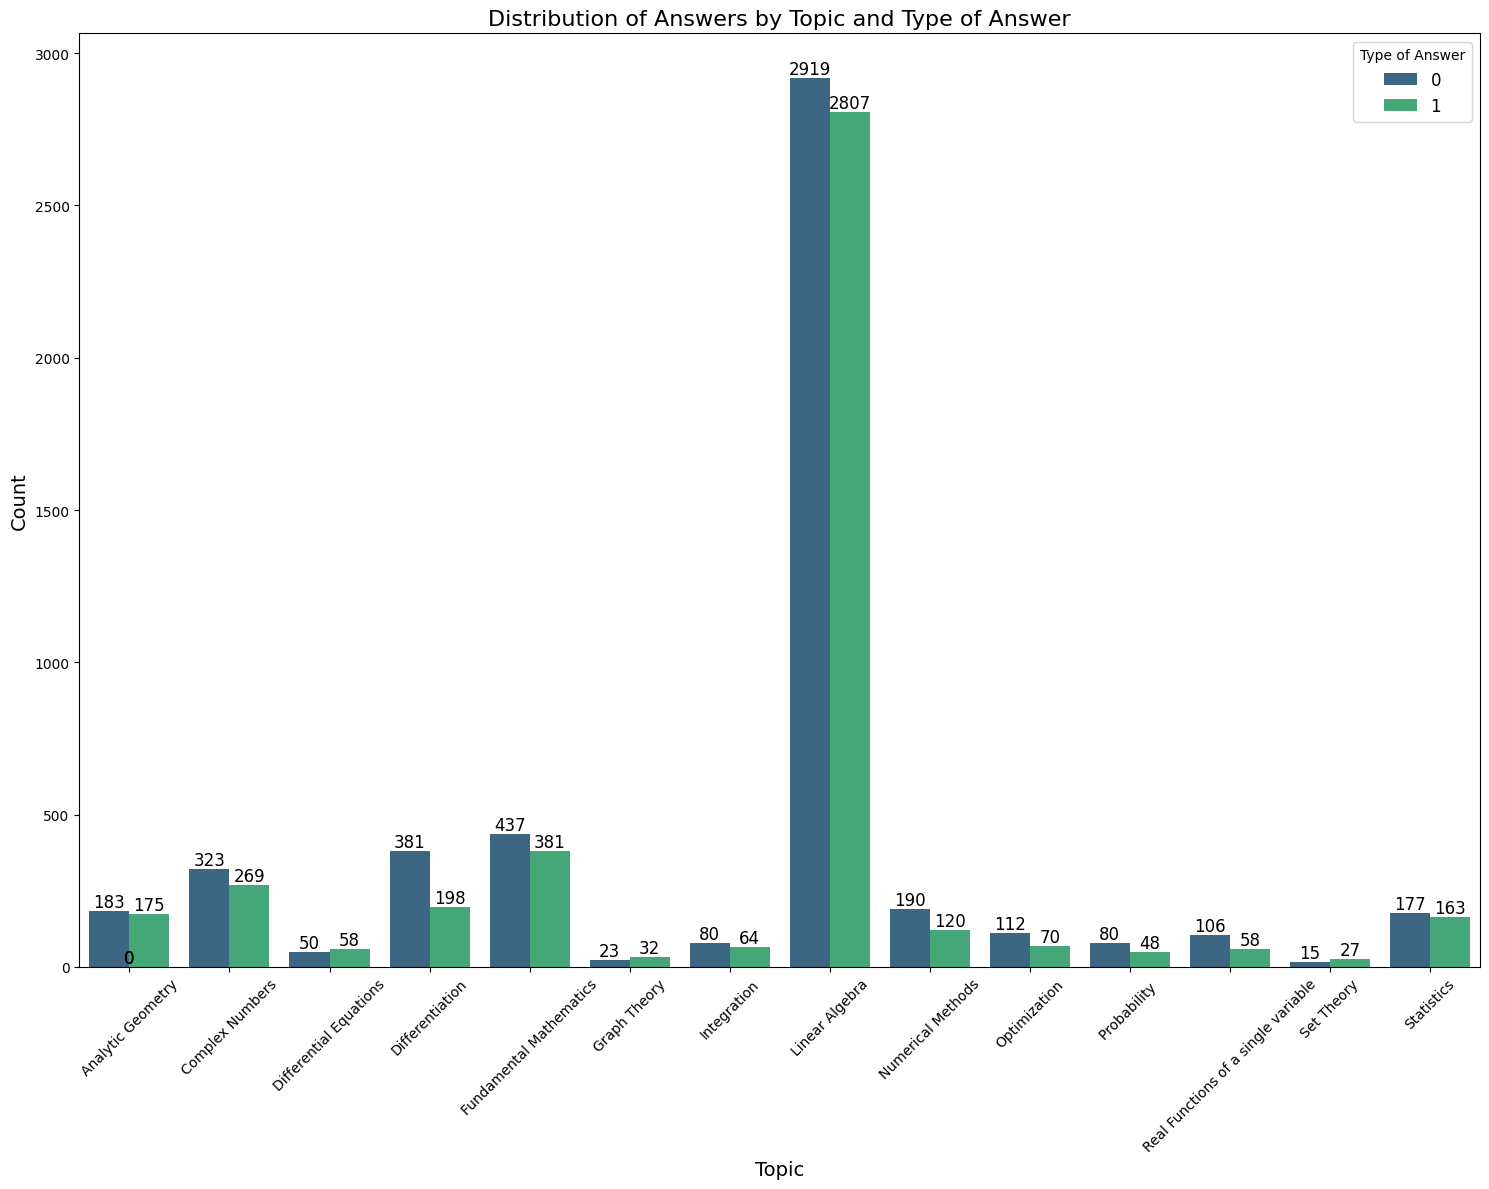

In [92]:
summary = df.groupby(['Topic', 'Type of Answer']).size().reset_index(name='Count')

plt.figure(figsize=(15, 12))
sns.barplot(data=summary, x='Topic', y='Count', hue='Type of Answer', palette='viridis')

plt.title('Distribution of Answers by Topic and Type of Answer', fontsize=16)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Type of Answer', fontsize=12)
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

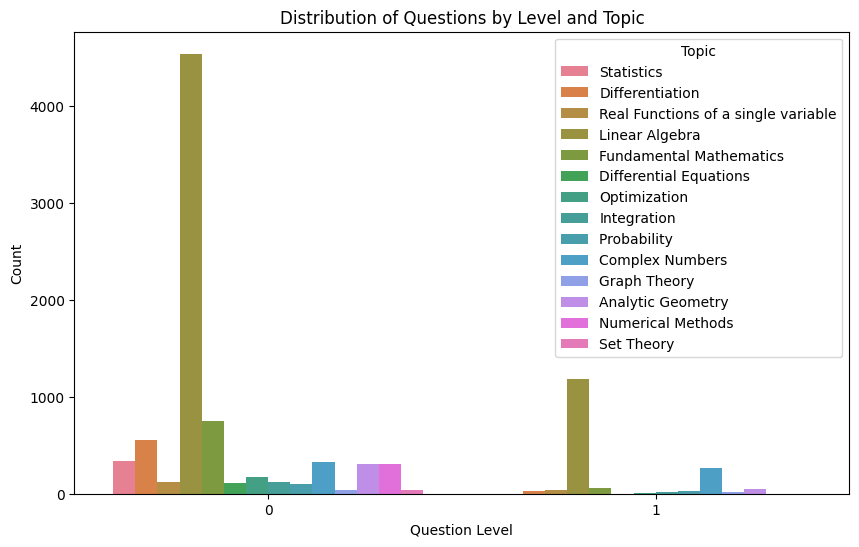

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Question Level', hue='Topic')
plt.title('Distribution of Questions by Level and Topic')
plt.xlabel('Question Level')
plt.ylabel('Count')
plt.legend(title='Topic')
plt.show()

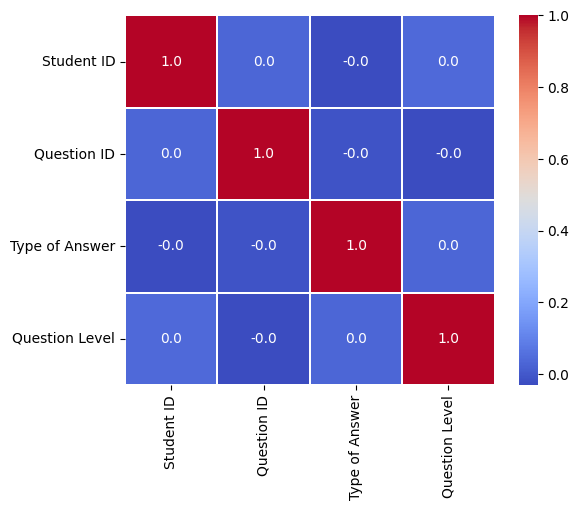

In [93]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');

In [94]:
df['Type of Answer'].value_counts()

,count
Type of Answer,
0,5076
1,4470


<ipython-input-112-d6a36cfea757>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_scores, y='Topic', x='Type of Answer', palette='pastel')


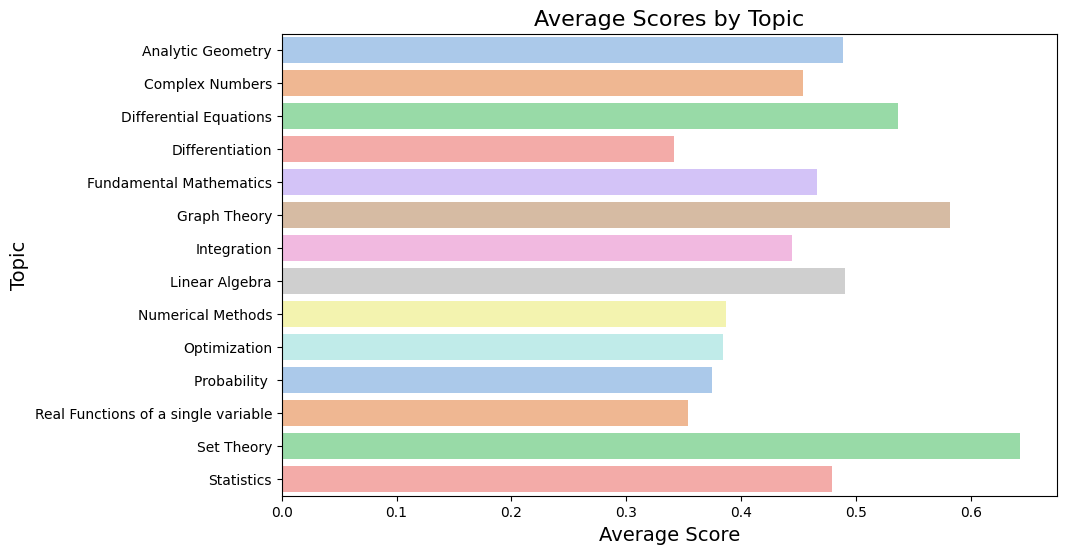

In [112]:
average_scores = df.groupby('Topic')['Type of Answer'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_scores, y='Topic', x='Type of Answer', palette='pastel')
plt.title('Average Scores by Topic', fontsize=16)
plt.ylabel('Topic', fontsize=14)
plt.xlabel('Average Score', fontsize=14)
plt.show()

<ipython-input-100-2b053005c46b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Question Level', y='Type of Answer', palette='coolwarm')


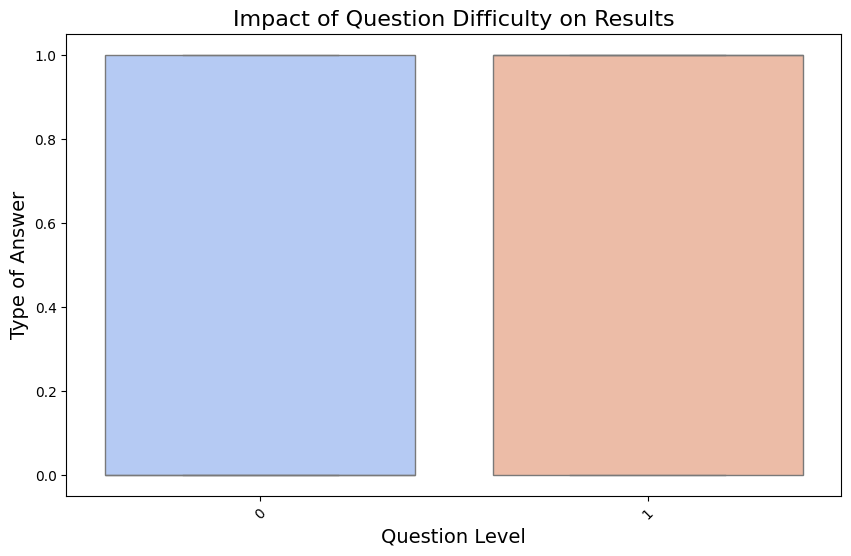

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Question Level', y='Type of Answer', palette='coolwarm')
plt.title('Impact of Question Difficulty on Results', fontsize=16)
plt.xlabel('Question Level', fontsize=14)
plt.ylabel('Type of Answer', fontsize=14)
plt.xticks(rotation=45)
plt.show();

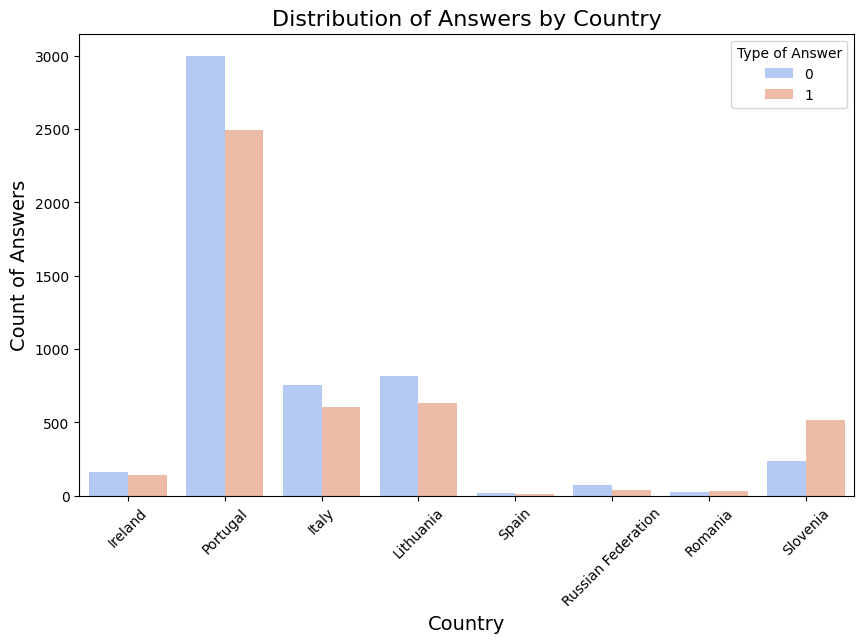

In [108]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Student Country', hue='Type of Answer', palette='coolwarm')
plt.title('Distribution of Answers by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count of Answers', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Type of Answer')
plt.show()

In [125]:
fig = px.histogram(df, x='Student Country', color='Topic',
                   title='Types of Answers by Student Countries with Topics and Question Levels',
                   labels={'Student Country': 'Student Country',
                           'count': 'Number of Answers',
                           'Topic': 'Topic'},
                   color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(
    width=1200,
    height=800,
    xaxis_title='Student Country',
    yaxis_title='Number of Answers',
    legend_title='Topic',
    barmode='group'
)

fig.update_traces(marker=dict(line=dict(width=1, color='black')),
                  opacity=0.75)

fig.show()